# Working on Real-Time Project with Python on 'India Census 2021 Dataset'

**(A part of Big Data Analysis)**

TEAM MEMBERS:-
    **SUBHRANEEL SAHA**
     & **BIDISA DAS**

<font color=lightgrey>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# INDIA CENSUS 2021 DATASET

<font color=lightgrey>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

This data is about total Population, Demography, Literacy, Districts, States, Workers, Religion, Education, Age. Here we also plot the India map to check whether all the states are present in the data.

The data used here is of 2021 India Census of each district.

The data is available as a CSV file, downloaded from Kaggle and the other data of india census is available as a Geojson file, downloaded from CART.

We will this data using four DataFrames i.e. geopandas, contextily, matplotlib.pyplot, pandas & seaborn.

The following dataframes are explained:-

**Geopandas -** GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

**Contextily -** Contextily is a small Python 3 (3.7 and above) package to retrieve tile maps from the internet. It can add those tiles as basemap to matplotlib figures or write tile maps to disk into geospatial raster files.

**Matplotlib/matplotlib.pyplot -** Matplotlib or matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

**Pandas -** Pandas is an open-source Python package that is most widely used for Data Science, Data Analysis, and Machine Learning tasks.Pandas is a predominantly used python data analysis library. It provides many functions and methods to expedite the data analysis process. What makes pandas so common is its functionality, flexibility, and simple syntax.

**Seaborn -** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.

**1) Exporting of all the states of India** 

**1.1) The libraries**

In [1]:
#to read and visulaize spatial data
import geopandas as gpd

#to provide basemaps
import contextily as ctx

#to give more power to your figures (plots)
import matplotlib.pyplot as plt

**1.2)We make the call to load and read the data that was downloaded from census reporter. Take note at the relative path reference to find the file in your file directory.**

In [2]:
gdf = gpd.read_file(r'H:\New folder (2)\choropleth-python-tutorial-master\states_india.geojson')

**1.3) Preliminary inspection**

In [3]:
gdf.shape

(36, 4)

In [4]:
#get first 5 rows
gdf.head()

cartodb_id  state_code                     st_nm  \
0           1           0                 Telangana   
1           2          35  Andaman & Nicobar Island   
2           3          28            Andhra Pradesh   
3           4          12        Arunanchal Pradesh   
4           5          18                     Assam   

                                            geometry  
0  MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...  
1  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...  
2  MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...  
3  MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...  
4  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...

In [5]:
#get a random row
gdf.sample(5)

cartodb_id  state_code                     st_nm  \
5            6          10                     Bihar   
32          23          17                 Meghalaya   
34          25          13                  Nagaland   
1            2          35  Andaman & Nicobar Island   
12          15           1           Jammu & Kashmir   

                                             geometry  
5   MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...  
32  MULTIPOLYGON (((91.85632 26.10353, 91.86717 26...  
34  MULTIPOLYGON (((95.21458 26.93095, 95.21719 26...  
1   MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...  
12  MULTIPOLYGON (((74.73451 37.02068, 74.73647 37...

<AxesSubplot:>

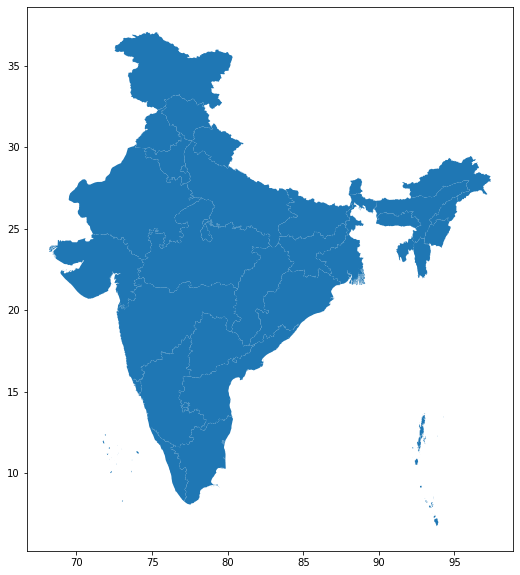

In [6]:
#plot it!
gdf.plot(figsize=(10,10))

<AxesSubplot:>

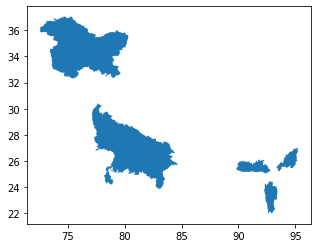

In [7]:
gdf.sample(5).plot()

**1.4) Data Types**

To get the data types, we will use **.info().**

In [8]:
#look at columns, null values, and the data types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cartodb_id  36 non-null     int64   
 1   state_code  36 non-null     int64   
 2   st_nm       36 non-null     object  
 3   geometry    36 non-null     geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 1.2+ KB


**1.5) The FIPS code**

The Federal Information Processing Standard Publication 6-4 (FIPS 6-4) was a five-digit Federal Information Processing Standards code which uniquely identified counties and county equivalents in the United States, certain U.S. possessions, and certain freely associated states.

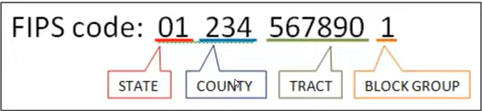

In [9]:
from PIL import Image
img = Image.open('FIPS.png')
img

In [10]:
gdf = gpd.read_file(r'H:\New folder (2)\choropleth-python-tutorial-master\states_india.geojson')
gdf.geometry.head()

0    MULTIPOLYGON (((78.34088 19.88361, 78.35133 19...
1    MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
2    MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...
3    MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...
4    MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
Name: geometry, dtype: geometry

In [11]:
#drop the row with index 0(i.e. the first row)
gdf = gdf.drop([0])

In [12]:
#check to see if it has been deleted
gdf.head()

cartodb_id  state_code                     st_nm  \
1           2          35  Andaman & Nicobar Island   
2           3          28            Andhra Pradesh   
3           4          12        Arunanchal Pradesh   
4           5          18                     Assam   
5           6          10                     Bihar   

                                            geometry  
1  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...  
2  MULTIPOLYGON (((81.39375 16.33381, 81.39224 16...  
3  MULTIPOLYGON (((96.16261 29.38078, 96.16860 29...  
4  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...  
5  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...

**1.6) Listing the columns**

In [13]:
list(gdf)

['cartodb_id', 'state_code', 'st_nm', 'geometry']

**1.7) Double check your data integrity**

Does the math add up?Let's check. The total population should equal the rest of the columns.

In [14]:
#get a random record
random_tract = gdf.sample()
random_tract

cartodb_id  state_code    st_nm  \
26          32          16  Tripura   

                                             geometry  
26  MULTIPOLYGON (((92.22109 24.50131, 92.22771 24...

**2) Now let us work with the census dataset!!!**

In [15]:
#to give more power to your figures (plots)
import matplotlib.pyplot as plt

#to get and visualise the statistical dataset
import pandas as pd

#to provide basemaps
import contextily as ctx

In [16]:
marvel=pd.read_csv('India Census 2021.csv')

In [17]:
marvel

District_code                   State_name              District_name  \
0                1            JAMMU AND KASHMIR                    Kupwara   
1                2            JAMMU AND KASHMIR                     Badgam   
2                3            JAMMU AND KASHMIR                Leh(Ladakh)   
3                4            JAMMU AND KASHMIR                     Kargil   
4                5            JAMMU AND KASHMIR                      Punch   
..             ...                          ...                        ...   
635            636                  PONDICHERRY                       Mahe   
636            637                  PONDICHERRY                   Karaikal   
637            638  ANDAMAN AND NICOBAR ISLANDS                   Nicobars   
638            639  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman   
639            640  ANDAMAN AND NICOBAR ISLANDS              South Andaman   

     Population    Male  Female  Literate  Workers  Male_Workers  \
0        870354  474190  396164    439654   229064        190899   
1        753745  398041  355704    335649   214866        162578   
2        133487   78971   54516     93770    75079         53265   
3        140802   77785   63017     86236    51873         39839   
4        476835  251899  224936    261724   161393        117677   
..          ...     ...     ...       ...      ...           ...   
635       41816   19143   22673     36470    11802          9093   
636      200222   97809  102413    154916    68301         53139   
637       36842   20727   16115     25332    17125         12714   
638      105597   54861   50736     78683    38579         30612   
639      238142  127283  110859    190266    96831         77563   

     Female_Workers  ...  Christians  Sikhs  Buddhists  Jains  \
0             38165  ...        1700   5600         66     39   
1             52288  ...        1489   5559         47      6   
2             21814  ...         658   1092      88635    103   
3             12034  ...         604   1171      20126     28   
4             43716  ...         958  11188         83     10   
..              ...  ...         ...    ...        ...    ...   
635            2709  ...         958      3         21     14   
636           15162  ...       18391     46         63     54   
637            4411  ...       26077    343        119      0   
638            7967  ...       21870     77         84      4   
639           19268  ...       33037    866        135     27   

     Secondary_Education  Higher_Education  Graduate_Education  \
0                  74948             39709               21751   
1                  66459             41367               27950   
2                  16265              8923                6197   
3                  16938              9826                3077   
4                  46062             29517               13962   
..                   ...               ...                 ...   
635                 8773              5711                4475   
636                29456             15930               18998   
637                 6325              3668                1300   
638                12707             10042                5133   
639                42150             29910               22388   

     Age_Group_0_29  Age_Group_30_49  Age_Group_50  
0            600759           178435         89679  
1            503223           160933         88978  
2             70703            41515         21019  
3             87532            35561         17488  
4            304979           109818         61334  
..              ...              ...           ...  
635           19760            12543          9428  
636          102333            60089         37434  
637           18786            12088          5922  
638           57350            30741         17464  
639          128402            76332         33128  

[640 rows x 25 columns]

<AxesSubplot:>

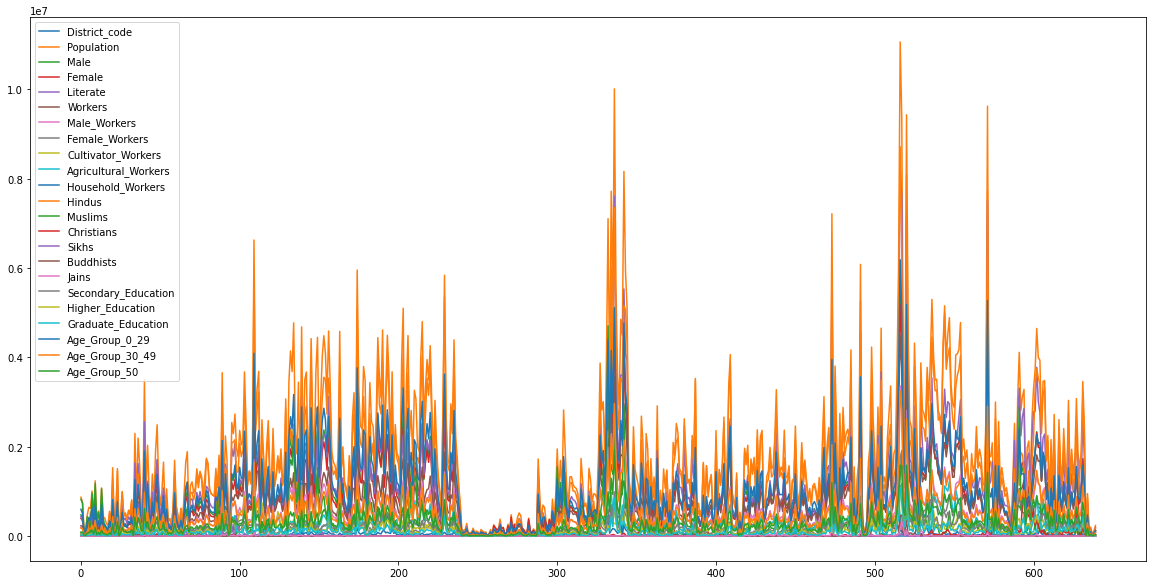

In [18]:
#plotting the census dataset
marvel.plot(figsize=(20,10))

In [19]:
#get first 5 rows
marvel.head()

District_code         State_name District_name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
0    439654   229064        190899           38165  ...        1700   5600   
1    335649   214866        162578           52288  ...        1489   5559   
2     93770    75079         53265           21814  ...         658   1092   
3     86236    51873         39839           12034  ...         604   1171   
4    261724   161393        117677           43716  ...         958  11188   

   Buddhists  Jains  Secondary_Education  Higher_Education  \
0         66     39                74948             39709   
1         47      6                66459             41367   
2      88635    103                16265              8923   
3      20126     28                16938              9826   
4         83     10                46062             29517   

   Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
0               21751          600759           178435         89679  
1               27950          503223           160933         88978  
2                6197           70703            41515         21019  
3                3077           87532            35561         17488  
4               13962          304979           109818         61334  

[5 rows x 25 columns]

<AxesSubplot:>

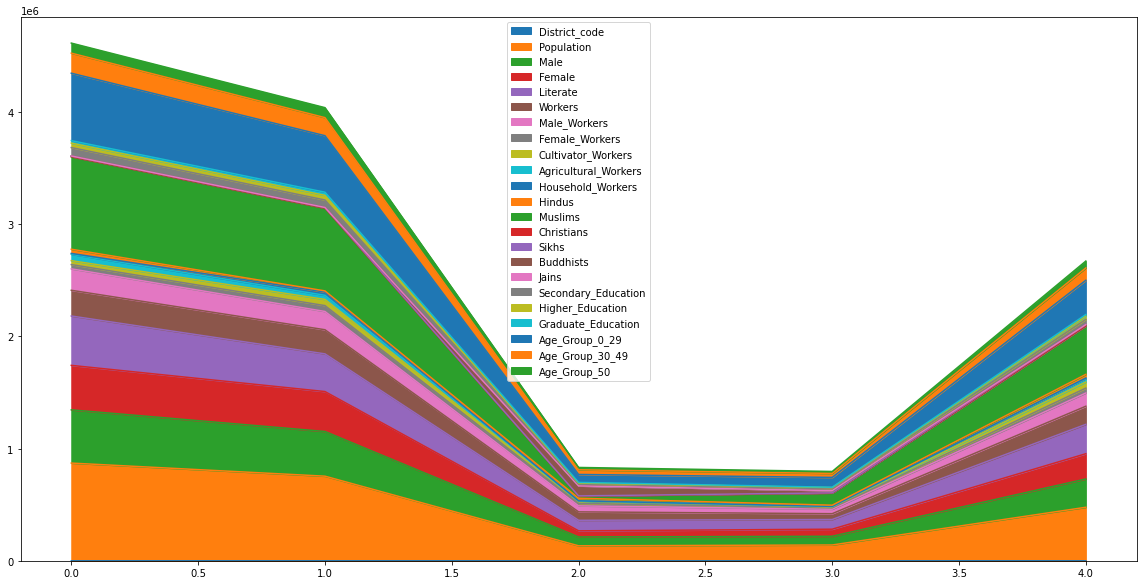

In [20]:
#plotting the first 5 rows of the dataset
marvel.head().plot(kind='area', figsize=(20,10))

In [21]:
#get last 5 rows
marvel.tail()

District_code                   State_name              District_name  \
635            636                  PONDICHERRY                       Mahe   
636            637                  PONDICHERRY                   Karaikal   
637            638  ANDAMAN AND NICOBAR ISLANDS                   Nicobars   
638            639  ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman   
639            640  ANDAMAN AND NICOBAR ISLANDS              South Andaman   

     Population    Male  Female  Literate  Workers  Male_Workers  \
635       41816   19143   22673     36470    11802          9093   
636      200222   97809  102413    154916    68301         53139   
637       36842   20727   16115     25332    17125         12714   
638      105597   54861   50736     78683    38579         30612   
639      238142  127283  110859    190266    96831         77563   

     Female_Workers  ...  Christians  Sikhs  Buddhists  Jains  \
635            2709  ...         958      3         21     14   
636           15162  ...       18391     46         63     54   
637            4411  ...       26077    343        119      0   
638            7967  ...       21870     77         84      4   
639           19268  ...       33037    866        135     27   

     Secondary_Education  Higher_Education  Graduate_Education  \
635                 8773              5711                4475   
636                29456             15930               18998   
637                 6325              3668                1300   
638                12707             10042                5133   
639                42150             29910               22388   

     Age_Group_0_29  Age_Group_30_49  Age_Group_50  
635           19760            12543          9428  
636          102333            60089         37434  
637           18786            12088          5922  
638           57350            30741         17464  
639          128402            76332         33128  

[5 rows x 25 columns]

<AxesSubplot:>

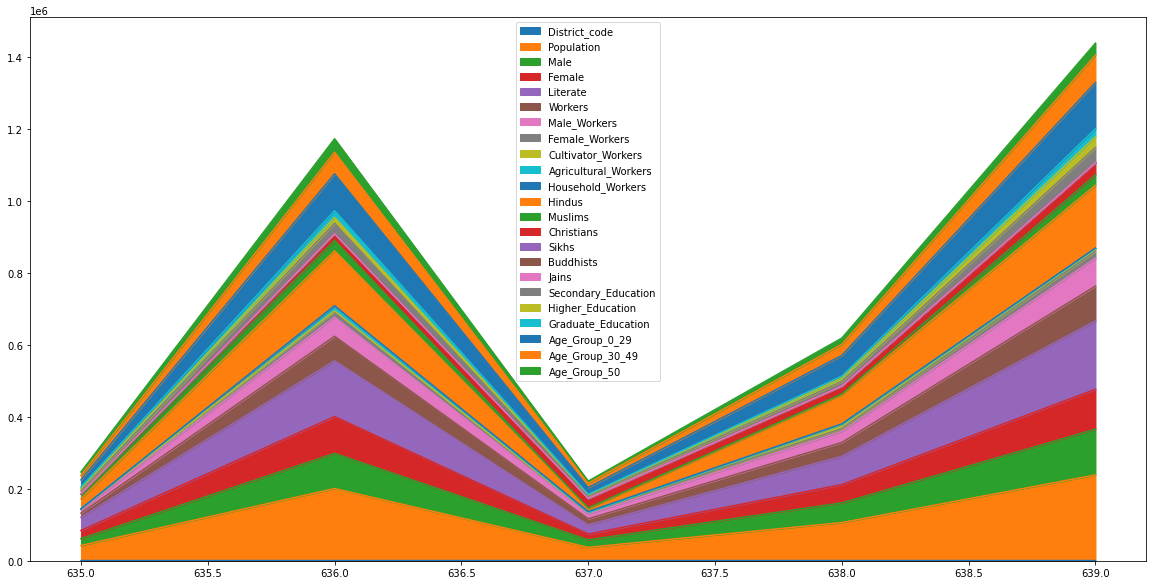

In [22]:
#plotting the last 5 rows of the dataset
marvel.tail().plot(kind='area', figsize=(20,10))

**2.1) Hiding the indexes of the dataframe.**

In [23]:
#df.style.hide_index()
marvel.style.hide_index()

**2.2) Setting the caption / heading of the dataframe.**

In [24]:
#df.style.set_caption('Caption')
marvel.style.set_caption('India Census 2021 Dataset')

**2.3) Show the records related with the districts - New Delhi, Lucknow, Kolkata.**

In [25]:
#df[df['Col_name'].isin(['Item_1' , 'Item_2' , 'Item_3'])]
marvel['District_name'].isin(['New Delhi', 'Lucknow', 'Kolkata'])

0      False
1      False
2      False
3      False
4      False
       ...  
635    False
636    False
637    False
638    False
639    False
Name: District_name, Length: 640, dtype: bool

In [26]:
marvel[marvel['District_name'].isin(['New Delhi', 'Lucknow', 'Kolkata'])]

District_code     State_name District_name  Population     Male   Female  \
93              94   NCT OF DELHI     New Delhi      142004    77942    64062   
156            157  UTTAR PRADESH       Lucknow     4589838  2394476  2195362   
341            342    WEST BENGAL       Kolkata     4496694  2356766  2139928   

     Literate  Workers  Male_Workers  Female_Workers  ...  Christians  Sikhs  \
93     114179    59541         46940           12601  ...        4852   2933   
156   3127260  1542806       1226399          316407  ...       20493  23883   
341   3588137  1795740       1412466          383274  ...       39758  13849   

     Buddhists  Jains  Secondary_Education  Higher_Education  \
93         312    679                15942             17742   
156       3877   4975               428121            378742   
341       4771  21178               555529            425245   

     Graduate_Education  Age_Group_0_29  Age_Group_30_49  Age_Group_50  
93                23934           76076            43913         21773  
156              639260         2678289          1161686        685258  
341              691804         2025389          1433314       1014769  

[3 rows x 25 columns]

**2.4) Calculation of state-wise:**

**A) Total number of population.**

In [27]:
#df.groupby('Col_name_1').Col_names.sum()

#data.groupby('State_name').Population.sum().sort_values(ascending = False)

#data.groupby('State_name')['Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains'].sum().sort_values(by = 'col_name')

In [28]:
data = marvel.groupby('State_name').Population.sum()
data

State_name
ANDAMAN AND NICOBAR ISLANDS       380581
ANDHRA PRADESH                  84580777
ARUNACHAL PRADESH                1383727
ASSAM                           31205576
BIHAR                          104099452
CHANDIGARH                       1055450
CHHATTISGARH                    25545198
DADRA AND NAGAR HAVELI            343709
DAMAN AND DIU                     243247
GOA                              1458545
GUJARAT                         60439692
HARYANA                         25351462
HIMACHAL PRADESH                 6864602
JAMMU AND KASHMIR               12541302
JHARKHAND                       32988134
KARNATAKA                       61095297
KERALA                          33406061
LAKSHADWEEP                        64473
MADHYA PRADESH                  72626809
MAHARASHTRA                    112374333
MANIPUR                          2855794
MEGHALAYA                        2966889
MIZORAM                          1097206
NAGALAND                         1978502
NCT O

Text(0, 0.5, 'Frequency')

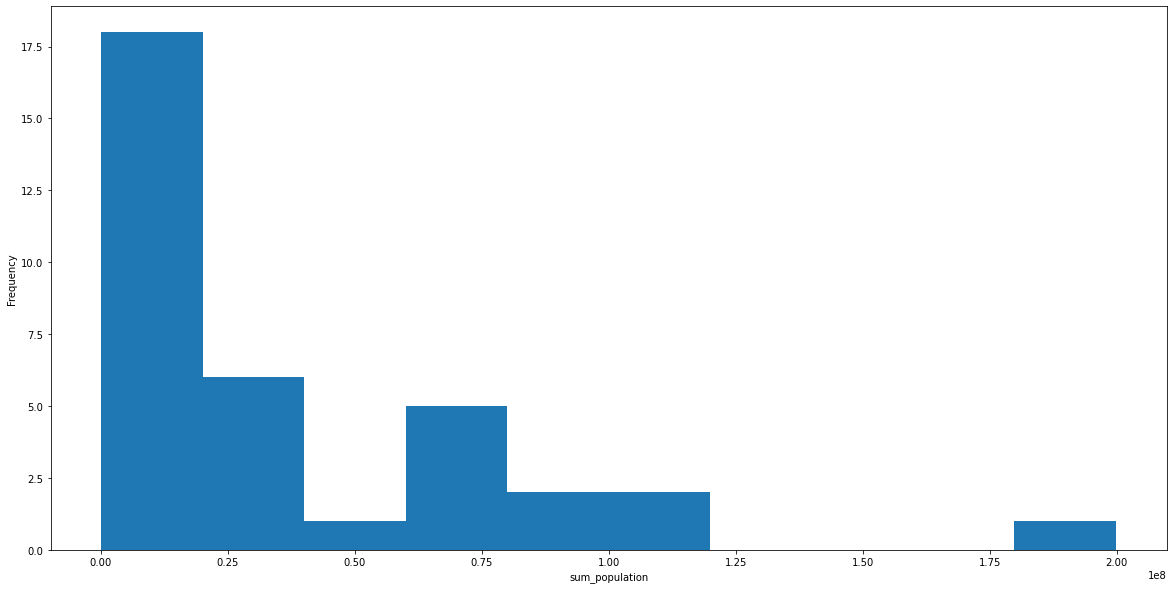

In [29]:
data.plot(kind='hist', figsize=(20,10))
plt.xlabel('sum_population')
plt.ylabel('Frequency')

In [30]:
#sorting the values
data_sort = marvel.groupby('State_name').Population.sum().sort_values()
data_sort

State_name
LAKSHADWEEP                        64473
DAMAN AND DIU                     243247
DADRA AND NAGAR HAVELI            343709
ANDAMAN AND NICOBAR ISLANDS       380581
SIKKIM                            610577
CHANDIGARH                       1055450
MIZORAM                          1097206
PONDICHERRY                      1247953
ARUNACHAL PRADESH                1383727
GOA                              1458545
NAGALAND                         1978502
MANIPUR                          2855794
MEGHALAYA                        2966889
TRIPURA                          3673917
HIMACHAL PRADESH                 6864602
UTTARAKHAND                     10086292
JAMMU AND KASHMIR               12541302
NCT OF DELHI                    16787941
HARYANA                         25351462
CHHATTISGARH                    25545198
PUNJAB                          27743338
ASSAM                           31205576
JHARKHAND                       32988134
KERALA                          33406061
ORISS

Text(0, 0.5, 'Frequency')

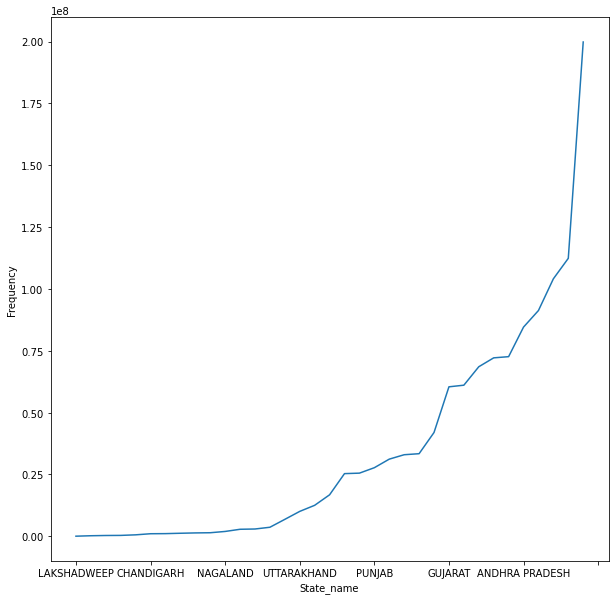

In [31]:
s1 = pd.Series(data_sort)
s1.plot(figsize=(10, 10))
plt.xlabel('State_name')
plt.ylabel('Frequency')

In [32]:
data_sort_false = marvel.groupby('State_name').Population.sum().sort_values(ascending = False)
data_sort_false

State_name
UTTAR PRADESH                  199812341
MAHARASHTRA                    112374333
BIHAR                          104099452
WEST BENGAL                     91276115
ANDHRA PRADESH                  84580777
MADHYA PRADESH                  72626809
TAMIL NADU                      72147030
RAJASTHAN                       68548437
KARNATAKA                       61095297
GUJARAT                         60439692
ORISSA                          41974218
KERALA                          33406061
JHARKHAND                       32988134
ASSAM                           31205576
PUNJAB                          27743338
CHHATTISGARH                    25545198
HARYANA                         25351462
NCT OF DELHI                    16787941
JAMMU AND KASHMIR               12541302
UTTARAKHAND                     10086292
HIMACHAL PRADESH                 6864602
TRIPURA                          3673917
MEGHALAYA                        2966889
MANIPUR                          2855794
NAGAL

Text(0, 0.5, 'Frequency')

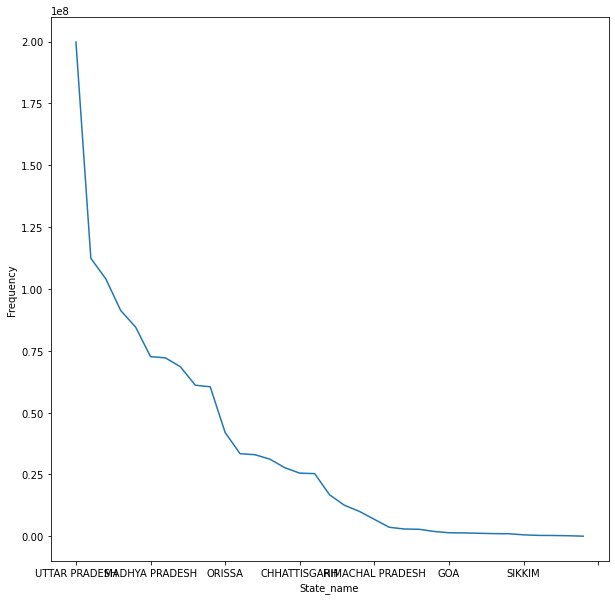

In [33]:
s2 = pd.Series(data_sort_false)
s2.plot(figsize=(10, 10))
plt.xlabel('State_name')
plt.ylabel('Frequency')

**B) Total no. of population with different religions.**

In [34]:
marvel.groupby('State_name')['Hindus','Muslims','Christians','Sikhs','Buddhists','Jains'].sum()

<ipython-input-34-082f767cdb17>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  marvel.groupby('State_name')['Hindus','Muslims','Christians','Sikhs','Buddhists','Jains'].sum()


Hindus   Muslims  Christians     Sikhs  \
State_name                                                               
ANDAMAN AND NICOBAR ISLANDS     264296     32413       80984      1286   
ANDHRA PRADESH                74824149   8082412     1129784     40244   
ARUNACHAL PRADESH               401876     27045      418732      3287   
ASSAM                         19180759  10679345     1165867     20672   
BIHAR                         86078686  17557809      129247     23779   
CHANDIGARH                      852574     51447        8720    138329   
CHHATTISGARH                  23819789    514998      490542     70036   
DADRA AND NAGAR HAVELI          322857     12922        5113       217   
DAMAN AND DIU                   220150     19277        2820       172   
GOA                             963877    121564      366130      1473   
GUJARAT                       53533988   5846761      316178     58246   
HARYANA                       22171128   1781342       50353   1243752   
HIMACHAL PRADESH               6532765    149881       12646     79896   
JAMMU AND KASHMIR              3566674   8567485       35631    234848   
JHARKHAND                     22376051   4793994     1418608     71422   
KARNATAKA                     51317472   7893065     1142647     28773   
KERALA                        18282492   8873472     6141269      3814   
LAKSHADWEEP                       1788     62268         317         8   
MADHYA PRADESH                66007121   4774695      213282    151412   
MAHARASHTRA                   89703057  12971152     1080073    223247   
MANIPUR                        1181876    239836     1179043      1527   
MEGHALAYA                       342078    130399     2213027      3045   
MIZORAM                          30136     14832      956331       286   
NAGALAND                        173054     48963     1739651      1890   
NCT OF DELHI                  13712100   2158684      146093    570581   
ORISSA                        39300341    911670     1161708     21991   
PONDICHERRY                    1089409     75556       78550       297   
PUNJAB                        10678138    535489      348230  16004754   
RAJASTHAN                     60657103   6215377       96430    872930   
SIKKIM                          352662      9867       60522      1868   
TAMIL NADU                    63188168   4229479     4418331     14601   
TRIPURA                        3063903    316042      159882      1070   
UTTAR PRADESH                159312654  38483967      356448    643500   
UTTARAKHAND                    8368636   1406825       37781    236340   
WEST BENGAL                   64385546  24654825      658618     63523   

                             Buddhists    Jains  
State_name                                       
ANDAMAN AND NICOBAR ISLANDS        338       31  
ANDHRA PRADESH                   36692    53849  
ARUNACHAL PRADESH               162815      771  
ASSAM                            54993    25949  
BIHAR                            25453    18914  
CHANDIGARH                        1160     1960  
CHHATTISGARH                     70467    61510  
DADRA AND NAGAR HAVELI             634     1186  
DAMAN AND DIU                      217      287  
GOA                               1095     1109  
GUJARAT                          30483   579654  
HARYANA                           7514    52613  
HIMACHAL PRADESH                 78659     1805  
JAMMU AND KASHMIR               112584     2490  
JHARKHAND                         8956    14974  
KARNATAKA                        95710   440280  
KERALA                            4752     4489  
LAKSHADWEEP                         10       11  
MADHYA PRADESH                  216052   567028  
MAHARASHTRA                    6531200  1400349  
MANIPUR                           7084     1692  
MEGHALAYA                         9864      627  
MIZORAM                          93411      376  
NAGALAND                          6759     

In [35]:
marvel.columns

Index(['District_code', 'State_name', 'District_name', 'Population', 'Male',
       'Female', 'Literate', 'Workers', 'Male_Workers', 'Female_Workers',
       'Cultivator_Workers', 'Agricultural_Workers', 'Household_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Secondary_Education', 'Higher_Education', 'Graduate_Education',
       'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50'],
      dtype='object')

**2.5) Number of Male Workers were there in West Bengal State**

In [36]:
#df[df.Col_name_1 == 'Item']['Col_name_2'].sum()
#marvel[marvel.State_name == 'WEST BENGAL']['Male_Workers'].sum()

In [37]:
p1 = marvel[marvel.State_name == 'WEST BENGAL']
p1

District_code   State_name               District_name  Population  \
326            327  WEST BENGAL                   Darjiling     1846823   
327            328  WEST BENGAL                  Jalpaiguri     3872846   
328            329  WEST BENGAL                  Koch Bihar     2819086   
329            330  WEST BENGAL              Uttar Dinajpur     3007134   
330            331  WEST BENGAL            Dakshin Dinajpur     1676276   
331            332  WEST BENGAL                      Maldah     3988845   
332            333  WEST BENGAL                 Murshidabad     7103807   
333            334  WEST BENGAL                     Birbhum     3502404   
334            335  WEST BENGAL                  Barddhaman     7717563   
335            336  WEST BENGAL                       Nadia     5167600   
336            337  WEST BENGAL  North Twenty Four Parganas    10009781   
337            338  WEST BENGAL                       Hugli     5519145   
338            339  WEST BENGAL                     Bankura     3596674   
339            340  WEST BENGAL                    Puruliya     2930115   
340            341  WEST BENGAL                       Haora     4850029   
341            342  WEST BENGAL                     Kolkata     4496694   
342            343  WEST BENGAL  South Twenty Four Parganas     8161961   
343            344  WEST BENGAL           Paschim Medinipur     5913457   
344            345  WEST BENGAL             Purba Medinipur     5095875   

        Male   Female  Literate  Workers  Male_Workers  Female_Workers  ...  \
326   937259   909564   1315585   683726        479586          204140  ...   
327  1983064  1889782   2498780  1512910       1091361          421549  ...   
328  1451542  1367544   1850504  1127977        845308          282669  ...   
329  1551066  1456068   1489667  1075626        799627          275999  ...   
330   857199   819077   1083685   702987        499560          203427  ...   
331  2051541  1937304   2086432  1537847       1086461          451386  ...   
332  3627564  3476243   4055834  2589907       1985667          604240  ...   
333  1790920  1711484   2158447  1331603       1029770          301833  ...   
334  3966889  3750674   5247208  2911251       2293083          618168  ...   
335  2653768  2513832   3480555  1842607       1554090          288517  ...   
336  5119389  4890392   7608693  3571624       2945189          626435  ...   
337  2814653  2704492   4078388  2152870       1713608          439262  ...   
338  1838095  1758579   2232992  1466220       1050822          415398  ...   
339  1496996  1433119   1624905  1249642        801254          448388  ...   
340  2500819  2349210   3605206  1819845       1498170          321675  ...   
341  2356766  2139928   3588137  1795740       1412466          383274  ...   
342  4173778  3988183   5531657  2964494       2356571          607923  ...   
343  3007885  2905572   4078412  2509159       1757358          751801  ...   
344  2629834  2466041   3923194  1910320       1516096          394224  ...   

     Christians  Sikhs  Buddhists  Jains  Secondary_Education  \
326      141848   2032     209240   1840               176129   
327      186279   2994      50676   1461               292056   
328        4122    449        445   1869               209153   
329       16702    477        432   1324               163106   
330       24794    276        148    323               135556   
331       13209    747        359    639               238078   
332       18102    766        348   3037               443254   
333       10906    582        258   1152               245201   
334       21220  16675       1602   1674               698251   
335       33835    849        514    281               412193   
336       26933   9394       5818   4452               989053   
337        7300   2662       1730   2160               515807   
338        3865    386        260   2904               261478   
339        86

In [38]:
male_workers = marvel[marvel.State_name == 'WEST BENGAL']['Male_Workers'].sum()
male_workers

26716047

Text(0, 0.5, 'Frequency')

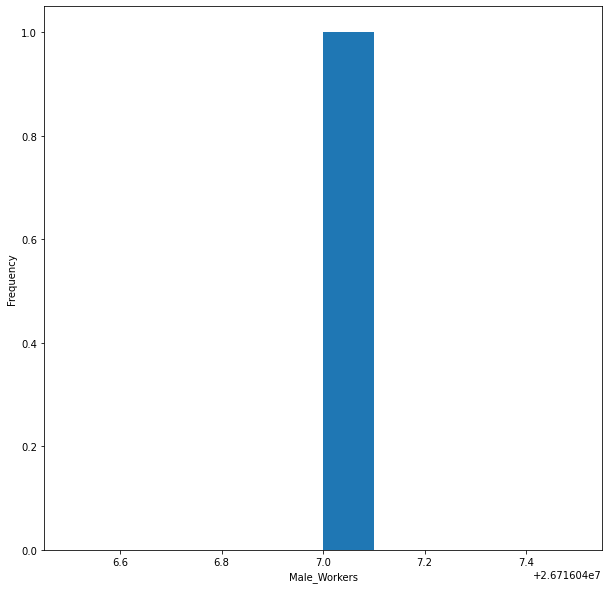

In [39]:
s3 = pd.Series(male_workers)
s3.plot(kind = 'hist', figsize=(10, 10))
plt.xlabel('Male_Workers')
plt.ylabel('Frequency')

**2.6) Setting a column as index of the dataframe**

In [40]:
#marvel = marvel.set_index('Col_name')
marvel.set_index('District_code')

State_name              District_name  \
District_code                                                           
1                        JAMMU AND KASHMIR                    Kupwara   
2                        JAMMU AND KASHMIR                     Badgam   
3                        JAMMU AND KASHMIR                Leh(Ladakh)   
4                        JAMMU AND KASHMIR                     Kargil   
5                        JAMMU AND KASHMIR                      Punch   
...                                    ...                        ...   
636                            PONDICHERRY                       Mahe   
637                            PONDICHERRY                   Karaikal   
638            ANDAMAN AND NICOBAR ISLANDS                   Nicobars   
639            ANDAMAN AND NICOBAR ISLANDS  North  AND Middle Andaman   
640            ANDAMAN AND NICOBAR ISLANDS              South Andaman   

               Population    Male  Female  Literate  Workers  Male_Workers  \
District_code                                                                
1                  870354  474190  396164    439654   229064        190899   
2                  753745  398041  355704    335649   214866        162578   
3                  133487   78971   54516     93770    75079         53265   
4                  140802   77785   63017     86236    51873         39839   
5                  476835  251899  224936    261724   161393        117677   
...                   ...     ...     ...       ...      ...           ...   
636                 41816   19143   22673     36470    11802          9093   
637                200222   97809  102413    154916    68301         53139   
638                 36842   20727   16115     25332    17125         12714   
639                105597   54861   50736     78683    38579         30612   
640                238142  127283  110859    190266    96831         77563   

               Female_Workers  Cultivator_Workers  ...  Christians  Sikhs  \
District_code                                      ...                      
1                       38165               34680  ...        1700   5600   
2                       52288               55299  ...        1489   5559   
3                       21814               20869  ...         658   1092   
4                       12034                8266  ...         604   1171   
5                       43716               54264  ...         958  11188   
...                       ...                 ...  ...         ...    ...   
636                      2709                  43  ...         958      3   
637                     15162                2372  ...       18391     46   
638                      4411                 322  ...       26077    343   
639                      7967               10727  ...       21870     77   
640                     19268                5518  ...       33037    866   

               Buddhists  Jains  Secondary_Education  Higher_Education  \
District_code                                                            
1                     66     39                74948             39709   
2                     47      6                66459             41367   
3                  88635    103                16265              8923   
4                  20126     28                16938              9826   
5                     83     10                46062             29517   
...                  ...    ...                  ...               ...   
636                   21     14                 8773              5711   
637                   63     54                29456             15930   
638                  119      0                 6325              3668   
639                   84      4                12707             10042   
640                  135     27                42150             29910   

               Graduate_Education  Age_Group_0_29  Age_Group_30_49  \
District_code                   

**2.7) Analysation of the column names**

**A) Add a Suffix to the column names.**

In [41]:
#marvel = marvel.add_suffix('_value')
marvel.add_suffix('_rightone')

District_code_rightone          State_name_rightone  \
0                         1            JAMMU AND KASHMIR   
1                         2            JAMMU AND KASHMIR   
2                         3            JAMMU AND KASHMIR   
3                         4            JAMMU AND KASHMIR   
4                         5            JAMMU AND KASHMIR   
..                      ...                          ...   
635                     636                  PONDICHERRY   
636                     637                  PONDICHERRY   
637                     638  ANDAMAN AND NICOBAR ISLANDS   
638                     639  ANDAMAN AND NICOBAR ISLANDS   
639                     640  ANDAMAN AND NICOBAR ISLANDS   

        District_name_rightone  Population_rightone  Male_rightone  \
0                      Kupwara               870354         474190   
1                       Badgam               753745         398041   
2                  Leh(Ladakh)               133487          78971   
3                       Kargil               140802          77785   
4                        Punch               476835         251899   
..                         ...                  ...            ...   
635                       Mahe                41816          19143   
636                   Karaikal               200222          97809   
637                   Nicobars                36842          20727   
638  North  AND Middle Andaman               105597          54861   
639              South Andaman               238142         127283   

     Female_rightone  Literate_rightone  Workers_rightone  \
0             396164             439654            229064   
1             355704             335649            214866   
2              54516              93770             75079   
3              63017              86236             51873   
4             224936             261724            161393   
..               ...                ...               ...   
635            22673              36470             11802   
636           102413             154916             68301   
637            16115              25332             17125   
638            50736              78683             38579   
639           110859             190266             96831   

     Male_Workers_rightone  Female_Workers_rightone  ...  Christians_rightone  \
0                   190899                    38165  ...                 1700   
1                   162578                    52288  ...                 1489   
2                    53265                    21814  ...                  658   
3                    39839                    12034  ...                  604   
4                   117677                    43716  ...                  958   
..                     ...                      ...  ...                  ...   
635                   9093                     2709  ...                  958   
636                  53139                    15162  ...                18391   
637                  12714                     4411  ...                26077   
638                  30612                     7967  ...                21870   
639                  77563                    19268  ...                33037   

     Sikhs_rightone  Buddhists_rightone  Jains_rightone  \
0              5600                  66              39   
1              5559                  47               6   
2              1092               88635             103   
3              1171               20126              28   
4             11188                  83              10   
..              ...                 ...             ...   
635               3                  21              14   
636              46                  63              54   
637             343                 119               0   
638              77                  84               4   
639             866                 135              27   

     Secondary_Education_rig

**B) Add a Prefix to the column names.**

In [42]:
#marvel = marvel.add_suffix('value_')
marvel.add_prefix('leftone_')

leftone_District_code           leftone_State_name  \
0                        1            JAMMU AND KASHMIR   
1                        2            JAMMU AND KASHMIR   
2                        3            JAMMU AND KASHMIR   
3                        4            JAMMU AND KASHMIR   
4                        5            JAMMU AND KASHMIR   
..                     ...                          ...   
635                    636                  PONDICHERRY   
636                    637                  PONDICHERRY   
637                    638  ANDAMAN AND NICOBAR ISLANDS   
638                    639  ANDAMAN AND NICOBAR ISLANDS   
639                    640  ANDAMAN AND NICOBAR ISLANDS   

         leftone_District_name  leftone_Population  leftone_Male  \
0                      Kupwara              870354        474190   
1                       Badgam              753745        398041   
2                  Leh(Ladakh)              133487         78971   
3                       Kargil              140802         77785   
4                        Punch              476835        251899   
..                         ...                 ...           ...   
635                       Mahe               41816         19143   
636                   Karaikal              200222         97809   
637                   Nicobars               36842         20727   
638  North  AND Middle Andaman              105597         54861   
639              South Andaman              238142        127283   

     leftone_Female  leftone_Literate  leftone_Workers  leftone_Male_Workers  \
0            396164            439654           229064                190899   
1            355704            335649           214866                162578   
2             54516             93770            75079                 53265   
3             63017             86236            51873                 39839   
4            224936            261724           161393                117677   
..              ...               ...              ...                   ...   
635           22673             36470            11802                  9093   
636          102413            154916            68301                 53139   
637           16115             25332            17125                 12714   
638           50736             78683            38579                 30612   
639          110859            190266            96831                 77563   

     leftone_Female_Workers  ...  leftone_Christians  leftone_Sikhs  \
0                     38165  ...                1700           5600   
1                     52288  ...                1489           5559   
2                     21814  ...                 658           1092   
3                     12034  ...                 604           1171   
4                     43716  ...                 958          11188   
..                      ...  ...                 ...            ...   
635                    2709  ...                 958              3   
636                   15162  ...               18391             46   
637                    4411  ...               26077            343   
638                    7967  ...               21870             77   
639                   19268  ...               33037            866   

     leftone_Buddhists  leftone_Jains  leftone_Secondary_Education  \
0                   66             39                        74948   
1                   47              6                        66459   
2                88635            103                        16265   
3                20126             28                        16938   
4                   83             10                        46062   
..                 ...            ...                          ...   
635                 21             14                         8773   
636                 63             54                        29456   
637                119             

**2.8) Finding the mean and median of population in the dataset.**

In [43]:
marvel['Population'].mean()

1891960.9015625

In [44]:
marvel['Population'].median()

1557367.0